# AI Project 3 & Bonus

## Imports

In [1]:
import re
import networkx as nx #Bonus
import matplotlib.pyplot as plt #Bonus

## seperateAnds function

In [2]:
#Function to seperate A^B to [A,B]
def separateAnds(notation):
    if '^' in notation:
        return notation.split('^')
    else:
        return [notation]

## getEventEvidence function

In [3]:
#Function to seperate the event and evidence from the user input
def getEventEvidence(inp):
  # input = "P(A | FH^high)"
  match = re.match(r"P\(([^)]+)\)",inp)
  ins = match.group(1)
  lst=[a.strip() for a in ins.split("|")]
  return lst

## calculate_conditional_probability function

In [4]:
#Function that applies Bayes Theorem
def calculate_conditional_probability(joint_distribution, event, evidence):
    #Separate based on '^'
    evidence_list = separateAnds(evidence)
    event_list = separateAnds(event)
    # print(evidence_list)

    #Initialize the denominator and numerator
    den_sum=0
    num_sum=0

    for key,value in joint_distribution.items():
      # if (evidence_list[0] in key):
      if all(evidence in key for evidence in evidence_list):
        # print(value)
        den_sum+=value
    # print("Denometer: ",den_sum)

    numerator=evidence_list+event_list

    for key,value in joint_distribution.items():
      if all(notation in key for notation in numerator):
        # print(value)
        num_sum+=value
        num_sum= round(num_sum,5)

    # print("Numerator", num_sum)
    # print("Denometer",den_sum)

    return num_sum/den_sum

## Main program

In [6]:
joint_distribution = {
    ('high', 'A', 'F_H'): 0.175,
    ('high', '~A', 'F_H'): 0.075,
    ('normal', 'A', 'F_H'): 0.05,
    ('normal', '~A', 'F_H'): 0.2,
    ('high', 'A', '~F_H'): 0.2375,
    ('high', '~A', '~F_H'): 0.0125,
    ('normal', 'A', '~F_H'): 0.0125,
    ('normal', '~A', '~F_H'): 0.2375
}

# inp1="P(A|F_H)"
# inp2="P(A|~F_H^high)"
# inp3="P(F_H^high|~A)"
# inp4="P(A|F_H^high)"

inp= input("Enter the Proabililty you would like to check?\nInput format example: P(A | ~F_H^high):\n")

splitList=getEventEvidence(inp)
print(calculate_conditional_probability(joint_distribution, splitList[0],splitList[1]))

Enter the Proabililty you would like to check?
Input format example: P(A | ~F_H^high):
 P(A|~F_H^high)


0.95


## Bounus

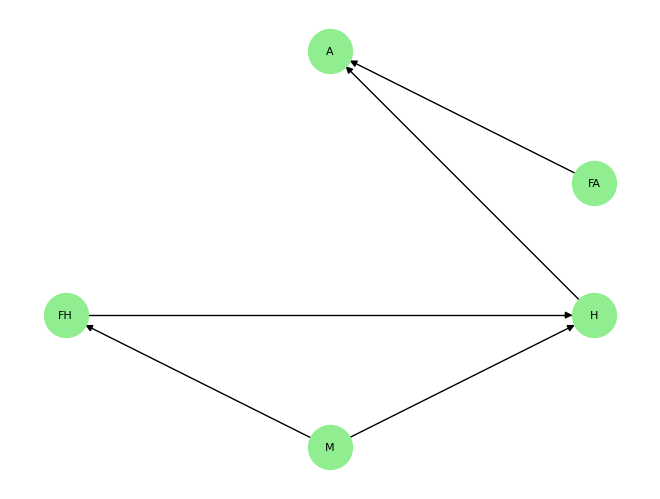

In [7]:
#Directed graph
G = nx.DiGraph()

#Adding the nodes
G.add_nodes_from(["A", "FA", "FH", "H", "M"])

#Adding the edges, the dependencies
G.add_edges_from([("M", "FH"), ("M", "H"), ("FH", "H"), ("H", "A"), ("FA", "A")])

#Setting positions for prettier view
pos = {"A": (1, 3), "FA": (2, 2), "FH": (0, 1), "H": (2, 1), "M": (1, 0)}

#Drawing the graph
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightgreen", font_size=8, font_color="black", arrowsize=10, connectionstyle="arc")
plt.show()
